In [2]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

In [3]:
N_ARMS = 4

In [4]:
class Env:
    def __init__(self):
        self.thetas = [0.1, 0.1, 0.2, 0.3]

    def react(self, arm):
        return 1 if np.random.rand() < self.thetas[arm] else 0
    
    def opt(self):
        return np.argmax(self.thetas)

In [5]:
class EpsilonGreedyAgent:
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.values = np.zeros(N_ARMS)  # 각 arm 을 선택하여 얻는 보상의 표본평균
        self.counts = np.zeros(N_ARMS)
    
    def get_arm(self):
        # exploration
        if np.random.rand() < self.epsilon:
            arm = np.random.randint(N_ARMS)
        # exploitation
        else:
            arm = np.argmax(self.values)
        return arm
    
    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] = (self.values[arm] * (self.counts[arm] - 1) + reward) / self.counts[arm]

In [6]:
# T 번의 스텝을 N 번 시뮬레이션해서 결과 평가
def sim(Agent, env, N=1000, T=1000, epsilon=0.1):
    seleted_arms = [[0 for _ in range(T)] for _ in range(N)]
    earned_rewards = [[0 for _ in range(T)] for _ in range(N)]
    for n in range(N):
        agent = Agent(epsilon)
        for t in range(T):
            arm = agent.get_arm()
            reward = env.react(arm)
            agent.update(arm, reward)
            seleted_arms[n][t] = arm
            earned_rewards[n][t] = reward
    return np.array(seleted_arms), np.array(earned_rewards)

In [7]:
env = Env()
arms1, rewards1 = sim(EpsilonGreedyAgent, env, 1000, 1000, 0.05)
arms2, rewards2 = sim(EpsilonGreedyAgent, env, 1000, 1000, 0.1)
arms3, rewards3 = sim(EpsilonGreedyAgent, env, 1000, 1000, 0.5)

acc1 = np.mean(arms1 == env.opt(), axis=0)
acc2 = np.mean(arms2 == env.opt(), axis=0)
acc3 = np.mean(arms3 == env.opt(), axis=0)

avg_rewards1 = np.mean(rewards1, axis=0)
avg_rewards2 = np.mean(rewards2, axis=0)
avg_rewards3 = np.mean(rewards3, axis=0)

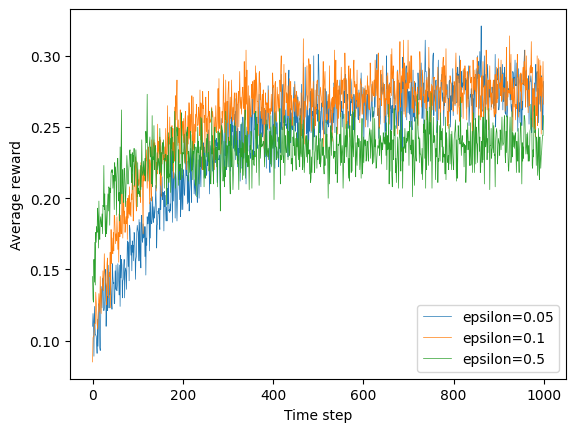

In [13]:
plt.plot(avg_rewards1, linewidth=0.5)
plt.plot(avg_rewards2, linewidth=0.5)
plt.plot(avg_rewards3, linewidth=0.5)

plt.xlabel('Time step')
plt.ylabel('Average reward')
plt.legend(['epsilon=0.05', 'epsilon=0.1', 'epsilon=0.5'])

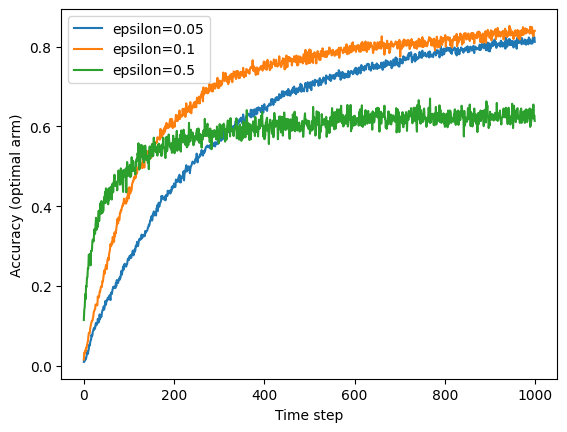

In [11]:
plt.plot(acc1)
plt.plot(acc2)
plt.plot(acc3)

plt.xlabel('Time step')
plt.ylabel('Accuracy (optimal arm)')
plt.legend(['epsilon=0.05', 'epsilon=0.1', 'epsilon=0.5'])